# Proyecto: Análisis de mercado inmobiliario

**¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica!**

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:Primer Modelo de Machine Learning

En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora.

## PROBLEMA

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, se espera que puedas crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

Deberás indagar qué datos podrían ayudarte a abordarla, realizar un análisis exploratorio y entrenar un modelo sencillo de Machine Learning para resolverla. Vuelca todo en el notebook y asegúrate de argumentar cada uno de los pasos y las decisiones. Es importante que, quien lo lea, entienda el flujo de trabajo, y qué has querido hacer. Recuerda: “simple y conciso” es una combinación ganadora.

**1. Pensando como un/a Data Scientist**
### Responde la siguiente pregunta:

¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?
Importante: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para abordar a una solución eficiente para nuestro modelo, es necesario contar con un dataset fidedigno con tasaciones realizadas de propiedades similares a las de nuestro propósito. Este dataset debe ser una muestra representativa del comportamiento del mercado inmobiliario de por lo menos los últimos 5 años. Es determinante revisar la fuente e investigar su reputación. Importante: Contar con una descripción minuciosa de las propiedades que integran el dataset. Tipo de propiedad, antigüedad, ubicación geográfica, cantidad de metros cuadrados, cubiertos y al aire libre, cantidad de ambientes, cantidad de baños, amenities, etc. Adicionalmente contar con otro dataset con datos oficinales de cada legislación que incluya el valor por metro cuadro por zona. Investigar si existe legislación sobre el valor de las propiedades y revisar su cumplimiento.

**2. Análisis Exploratorio de Datos**

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
¿Cuántos valores faltantes hay en cada columna?
¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al mínimo entregable que esperamos en la consigna.

In [1]:
# Importo las librerías necesarias para trabajar en la consigna.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
datos_properati = pd.read_csv ('DS_Proyecto_01_Datos_Properati.csv')
datos_properati.head (3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [3]:
# Imprimo cuántas filas y columnas tiene.
print('Cantidad de filas y columnas:',datos_properati.shape)

Cantidad de filas y columnas: (146660, 19)


Valores Faltantes: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
datos_properati.isnull().any()

start_date         False
end_date           False
created_on         False
lat                 True
lon                 True
l1                 False
l2                 False
l3                 False
rooms              False
bedrooms           False
bathrooms           True
surface_total       True
surface_covered     True
price              False
currency           False
title              False
description        False
property_type      False
operation_type     False
dtype: bool

In [5]:
count=datos_properati['lat'].isnull().sum()
print('La cantidad de valores nulos en lat es: ',count)

count1=datos_properati['lon'].isnull().sum()
print('La cantidad de valores nulos en lon es: ',count1)

count2=datos_properati['bathrooms'].isnull().sum()
print('La cantidad de valores nulos en bathrooms es: ',count2)

count3=datos_properati['surface_total'].isnull().sum()
print('La cantidad de valores nulos en surface_total es: ',count3)

count4=datos_properati['surface_covered'].isnull().sum()
print('La cantidad de valores nulos en surface_covered es: ',count4)

La cantidad de valores nulos en lat es:  9925
La cantidad de valores nulos en lon es:  9959
La cantidad de valores nulos en bathrooms es:  5957
La cantidad de valores nulos en surface_total es:  20527
La cantidad de valores nulos en surface_covered es:  21614


Tipos de propiedad: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. Pistas: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
# Veo cuántos tipos distintos de propiedades hay publicados según este datase.
len (datos_properati.property_type.unique().tolist())

10

In [7]:
# Agrupo y cuento cuantos corresponde a cada tipo de propiedad.
datos_properati.groupby (['property_type']).size()

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64

In [8]:
# Imprimo los estilos disponibles para armar los gráficos de forma uniforme.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


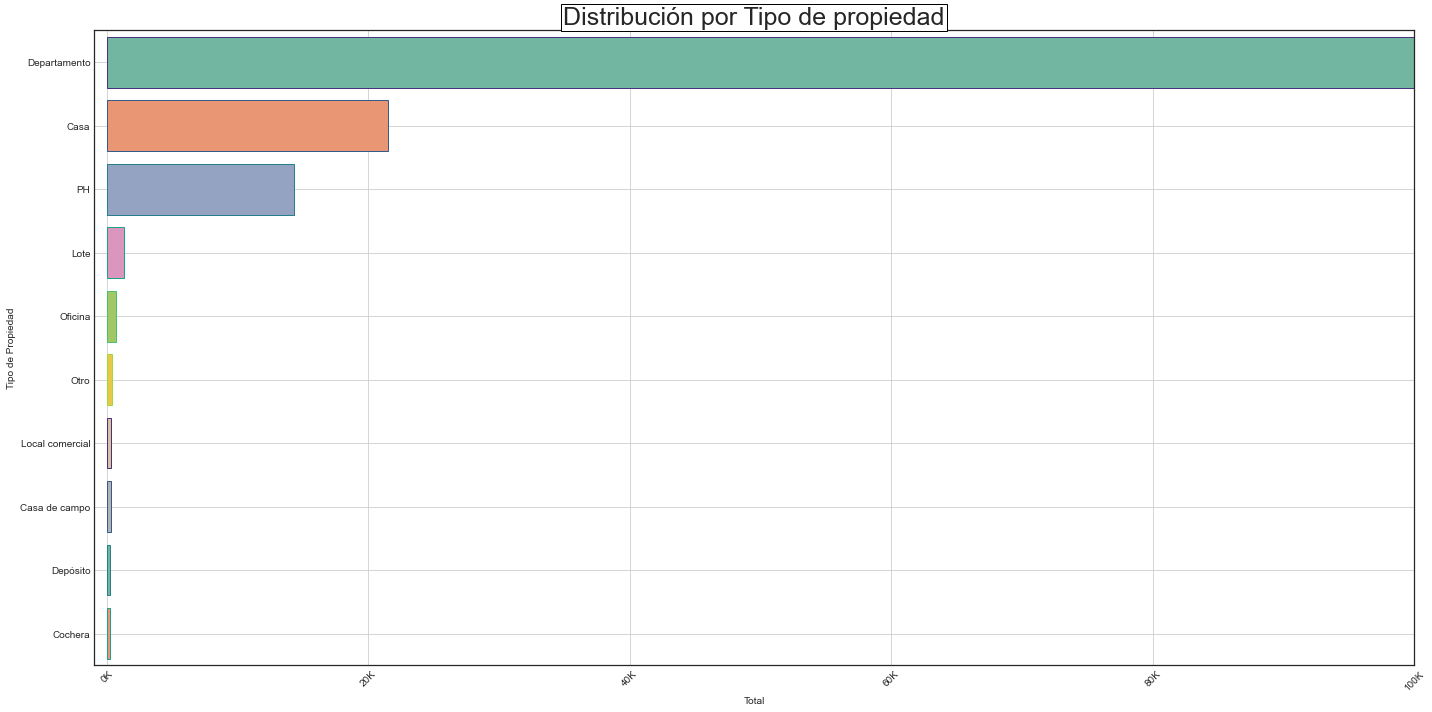

In [9]:
# Grafico la distribución por Tipo de propiedad.
plt.rcParams['figure.figsize'] =(20, 10)
plt.style.use('seaborn-white')
ax =sns.countplot(data = datos_properati, y= 'property_type',edgecolor=sns.color_palette("viridis"),palette="Set2",
              order = datos_properati['property_type'].value_counts().index)
ax.set(xlim=[-1000, 100000], xlabel='Total', ylabel='Tipo de Propiedad')
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribución por Tipo de propiedad',fontsize=25,
          bbox={"facecolor":"1","pad":2})
# Defino una función que me permita abreviar los ceros de los miles o millones con una letra
def abbreviate(x, pos):
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s
ax.xaxis.set_major_formatter(abbreviate)

plt.tight_layout()
plt.grid()
plt.show ()

¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [10]:
# Agrupo y cuento las variables Localidad y Barrio.
print(datos_properati.groupby (['l2']).size(),
      datos_properati.groupby (['l3']).size())

l2
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Oeste    12666
Bs.As. G.B.A. Zona Sur      17173
Capital Federal             92539
dtype: int64 l3
Abasto               462
Agronomía            165
Almagro             7527
Almirante Brown     1228
Avellaneda          1370
                    ... 
Villa Riachuelo       42
Villa Santa Rita     354
Villa Soldati         69
Villa Urquiza       3339
Villa del Parque    1361
Length: 89, dtype: int64


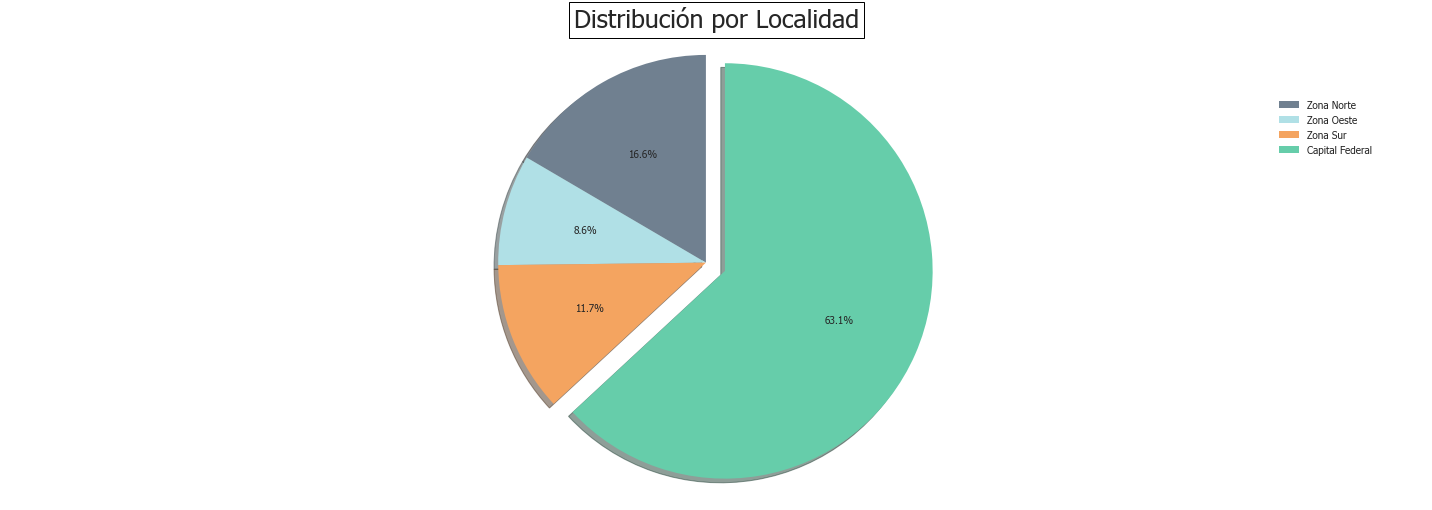

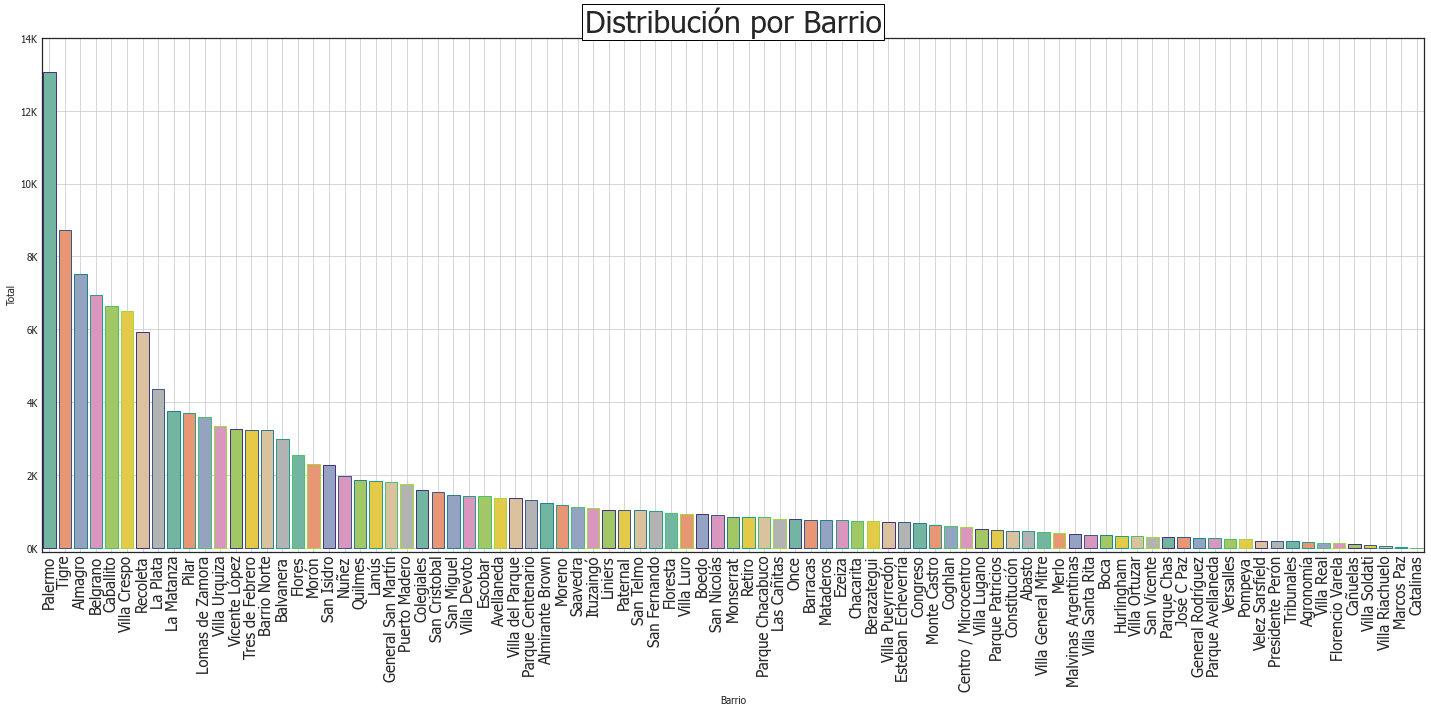

In [11]:
# Grafico ambas variables.

labels = ["Zona Norte","Zona Oeste","Zona Sur","Capital Federal"]
sizes = datos_properati.groupby (['l2']).size()
colores = ["slategray","powderblue","sandybrown","mediumaquamarine"]
desfase = (0, 0, 0, 0.1)
plt.pie(sizes, explode=desfase, autopct='%1.1f%%',
        shadow=True, startangle=90,colors= colores)
plt.title('Distribución por Localidad',fontsize=25,
          bbox={"facecolor":"1","pad":5})
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),
           loc='center left', borderaxespad=-0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=1, bottom=0.3)
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.axis('equal')

fig, ax = plt.subplots()
sns.countplot(data = datos_properati, x= 'l3',edgecolor=sns.color_palette("viridis"),
              palette="Set2",order = datos_properati['l3'].value_counts().index)
ax.set(ylim=[-100, 14000], ylabel='Total',xlabel='Barrio')
plt.tick_params(axis='x', labelrotation=90, labelsize =15)
plt.title('Distribución por Barrio',fontsize=30,
          bbox={"facecolor":"1","pad":2})
ax.yaxis.set_major_formatter(abbreviate)
plt.rcParams['figure.figsize'] =(20, 10)
plt.tight_layout()
plt.subplots_adjust(wspace=5)
plt.grid()
plt.show ()

Filtrando el Dataset: A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su shape.

In [12]:
# Creo un nuevo DataFrame filtrando el top 3 de tipo de propiedad & la región con más propiedades publicadas
df = pd.DataFrame (datos_properati[datos_properati.property_type.isin(['Departamento', 'PH', 'Casa']) 
                                   & (datos_properati.l2 =='Capital Federal')])

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

In [13]:
# Imprimo para verificar el Checkpoint.
print('Cantidad de filas y columnas:',df.shape)

Cantidad de filas y columnas: (91485, 19)


**Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price para cada tipo de propiedad. Para ello, ten en cuenta:

1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
2. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
3. Lo mismo ocurre con valores de superficie total muy chico.
4. Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.
5. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
6. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

In [14]:
# Antes me aseguro no tener instancias que esten cargados como objeto o cadena.
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [15]:
# Renombro las columnas(paso extra que no corresponde a los estadistico pero me ayuda a la visual).
df.rename (columns = {"lat":"Latitud", 'lon':'Longitud','l1':'País',
                      'l2':'Localidad','l3':'Barrio','rooms':'Ambientes',
                      'bedrooms':'Dormitorios','bathrooms':'Baños',
                      'surface_total':'Superficie_total',
                      'surface_covered':'Superficie_cubierta',
                      'price':'Precio','currency':'Divisa',
                      'property_type':'Tipo_de_propiedad','title':'Título',
                      'description':'Descripción', 
                      'operation_type':'Tipo_de_operación'}, inplace = True)
print('Nuevos nombres para las columnas:',df.columns)

Nuevos nombres para las columnas: Index(['start_date', 'end_date', 'created_on', 'Latitud', 'Longitud', 'País',
       'Localidad', 'Barrio', 'Ambientes', 'Dormitorios', 'Baños',
       'Superficie_total', 'Superficie_cubierta', 'Precio', 'Divisa', 'Título',
       'Descripción', 'Tipo_de_propiedad', 'Tipo_de_operación'],
      dtype='object')


In [16]:
# ¡Ahora si, a calcular los estadísticos!
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91485 entries, 0 to 146558
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_date           91485 non-null  object 
 1   end_date             91485 non-null  object 
 2   created_on           91485 non-null  object 
 3   Latitud              86951 non-null  float64
 4   Longitud             86937 non-null  float64
 5   País                 91485 non-null  object 
 6   Localidad            91485 non-null  object 
 7   Barrio               91485 non-null  object 
 8   Ambientes            91485 non-null  float64
 9   Dormitorios          91485 non-null  float64
 10  Baños                89314 non-null  float64
 11  Superficie_total     82568 non-null  float64
 12  Superficie_cubierta  82250 non-null  float64
 13  Precio               91485 non-null  float64
 14  Divisa               91485 non-null  object 
 15  Título               91485 non-null

In [17]:
df.describe()

,Latitud,Longitud,Ambientes,Dormitorios,Baños,Superficie_total,Superficie_cubierta,Precio
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Primeras conclusiones:**

* La cantidad máxima de 26 ambientes posiblemente sea un outlier.
* La cantidad máxima de 14 baños posiblemente corresponda a un outlier.
* La superficie cubierta y superficie total de 126062 es seguramente un outlier.  

In [18]:
# Reviso los atributos que posiblemente correspondan a los outliers.
df['Ambientes'].value_counts().sort_index()

1.0      8842
2.0     27249
3.0     28327
4.0     18414
5.0      5461
6.0      1824
7.0       710
8.0       405
9.0        80
10.0       80
11.0       29
12.0       35
13.0        2
14.0        4
15.0        7
16.0        5
18.0        4
20.0        4
21.0        1
26.0        2
Name: Ambientes, dtype: int64

**Los valores de Ambientes superiores a 7 son poco representativos.**

In [19]:
df['Baños'].value_counts().sort_index()

1.0     54801
2.0     23573
3.0      7645
4.0      2365
5.0       714
6.0       154
7.0        39
8.0         4
9.0         5
10.0        7
11.0        3
12.0        1
14.0        3
Name: Baños, dtype: int64

**Los valores de Baños superiores a 6 son poco representativos.**

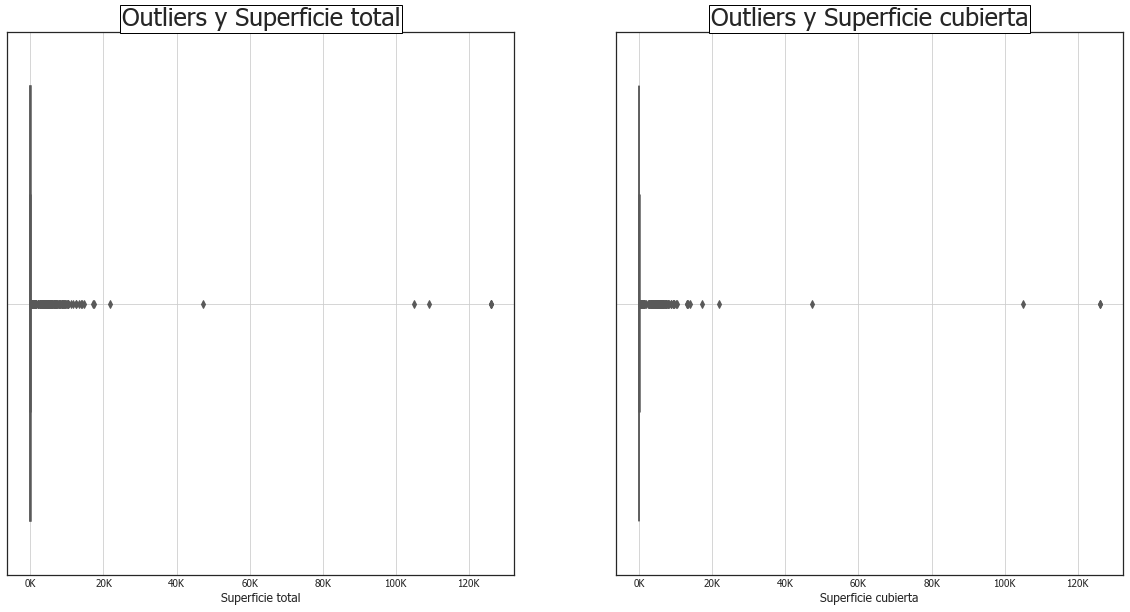

In [20]:
# Realizo un boplot rápido para ver como es la distribución de la Superficie total y cubierta.
plt.subplot(1,2,1)
ax=sns.boxplot(data=df,x='Superficie_total',palette='Set2')
plt.grid()
ax.xaxis.set_major_formatter(abbreviate)
plt.xlabel('Superficie total', fontsize=12)
ax.set_title('Outliers y Superficie total',fontsize=25,bbox={"facecolor":"1","pad":2})

plt.subplot(1,2,2)
ax=sns.boxplot(data=df,x='Superficie_cubierta',palette='Set2')
plt.grid()
ax.xaxis.set_major_formatter(abbreviate)
ax.set_title('Outliers y Superficie cubierta',fontsize=25,bbox={"facecolor":"1","pad":2})
plt.xlabel('Superficie cubierta', fontsize=12)

plt.show()

 **De acuerdo al grafico considero que los valores superiores a 20.000 seguramente sean outliers.**

In [21]:
# Para resolver este problema y eliminar los valores extremadamente alejados decidi aplica el rango intercuartílico IQR
# Primero lo realizo sobre las Superficies. Utilizo el cuantil 0.01 para evitar tener valores negativos en la superficie minima
unicos = df['Tipo_de_propiedad'].unique()

In [22]:
for x in unicos:
    Q1 = df[df['Tipo_de_propiedad']==x]['Superficie_total'].quantile(0.25)
    Q3 = df[df['Tipo_de_propiedad']==x]['Superficie_total'].quantile(0.75)
    IQR = Q3 - Q1
    surface_min = df[df['Tipo_de_propiedad']==x]['Superficie_total'].quantile(0.01) 
    surface_max = Q3 + (IQR*1.5)
    print(x)
    print('La Superficie maxima es {} y la superficie minima es {} y el IQR {}' .format(surface_max,surface_min,IQR))
    print('------------------------------------------------------------------------------')

Departamento
La Superficie maxima es 177.0 y la superficie minima es 25.0 y el IQR 52.0
------------------------------------------------------------------------------
PH
La Superficie maxima es 275.0 y la superficie minima es 35.0 y el IQR 82.0
------------------------------------------------------------------------------
Casa
La Superficie maxima es 579.0 y la superficie minima es 56.0 y el IQR 166.0
------------------------------------------------------------------------------


In [23]:
# Divido el dataset por tipo de propiedad para graficar su distribución sin los outliers.
df_dpto=df[df['Tipo_de_propiedad']=='Departamento'] 
df_ph=df[df['Tipo_de_propiedad']=='PH'] 
df_casa=df[df['Tipo_de_propiedad']=='Casa'] 

In [24]:
# Filtro los subgrupos de nuestro dataset excluyendo los outliers.
df_dpto=df_dpto[(df_dpto.Superficie_total<=177.0)&(df_dpto.Superficie_total>=25.0)]
df_ph=df_ph[(df_ph.Superficie_total<=257.0)&(df_ph.Superficie_total>=35.0)]
df_casa=df_casa[(df_casa.Superficie_total<=579.0)&(df_casa.Superficie_total>=56.0)]

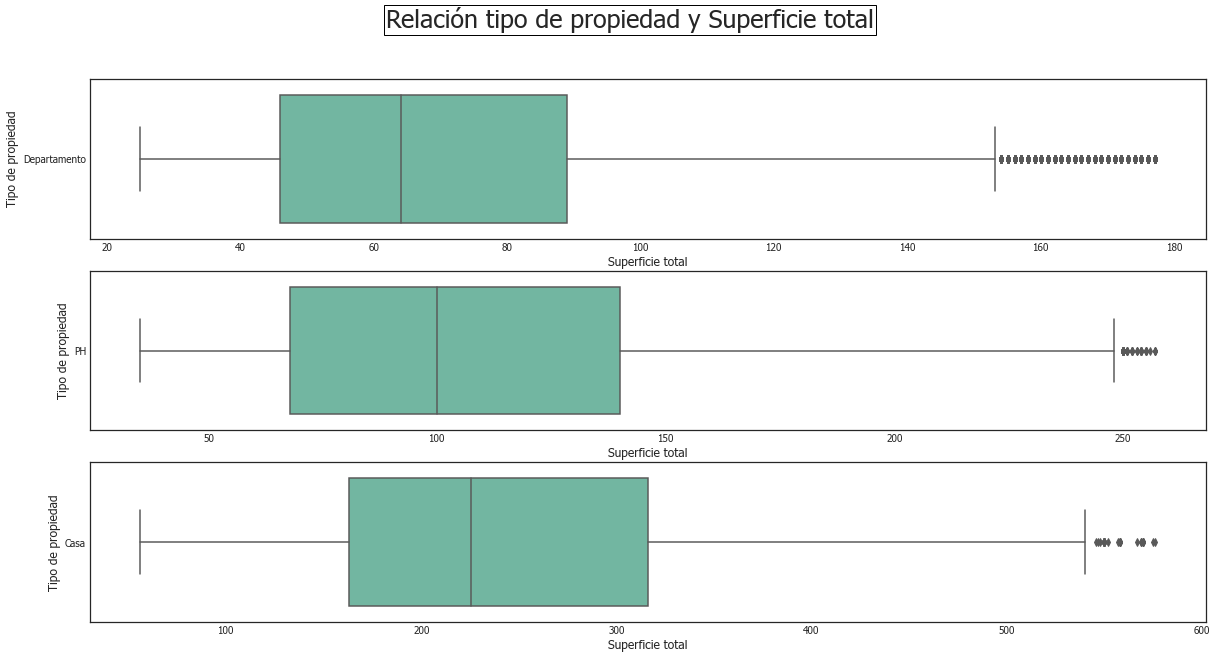

In [25]:
# Realizo los boxplot por tipo de propiedad sin outliers.
plt.figure (figsize=(20,10))
plt.suptitle('Relación tipo de propiedad y Superficie total',fontsize=25,bbox={"facecolor":"1","pad":2})

plt.subplot(3,1,1)
ax=sns.boxplot(data=df_dpto,x='Superficie_total',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Superficie total', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)

plt.subplot(3,1,2)
ax=sns.boxplot(data=df_ph,x='Superficie_total',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Superficie total', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)

plt.subplot(3,1,3)
ax=sns.boxplot(data=df_casa,x='Superficie_total',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Superficie total', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)

plt.show()

Ahora podemos observar los boxplot mucho más claros. Si bien aún tenemos valores atípicos podemos ver la mediana por tipo de propiedad sin problema. La asimetría de los datos nos indica que los datos no están distribuidos normalmente. La dispersión más amplia la encontramos en el tipo PH mientras que la Superficie total mayor le corresponden al tipo casa.

In [26]:
# Realizo un filtro delimitando la superficie total a los valores que determinamos con el rango intercuartilico IQR
df = pd.DataFrame (df[(df.Superficie_total >= 25) & (df.Superficie_total <= 579)])
df. head ()

,start_date,end_date,created_on,Latitud,Longitud,País,Localidad,Barrio,Ambientes,Dormitorios,Baños,Superficie_total,Superficie_cubierta,Precio,Divisa,Título,Descripción,Tipo_de_propiedad,Tipo_de_operación
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


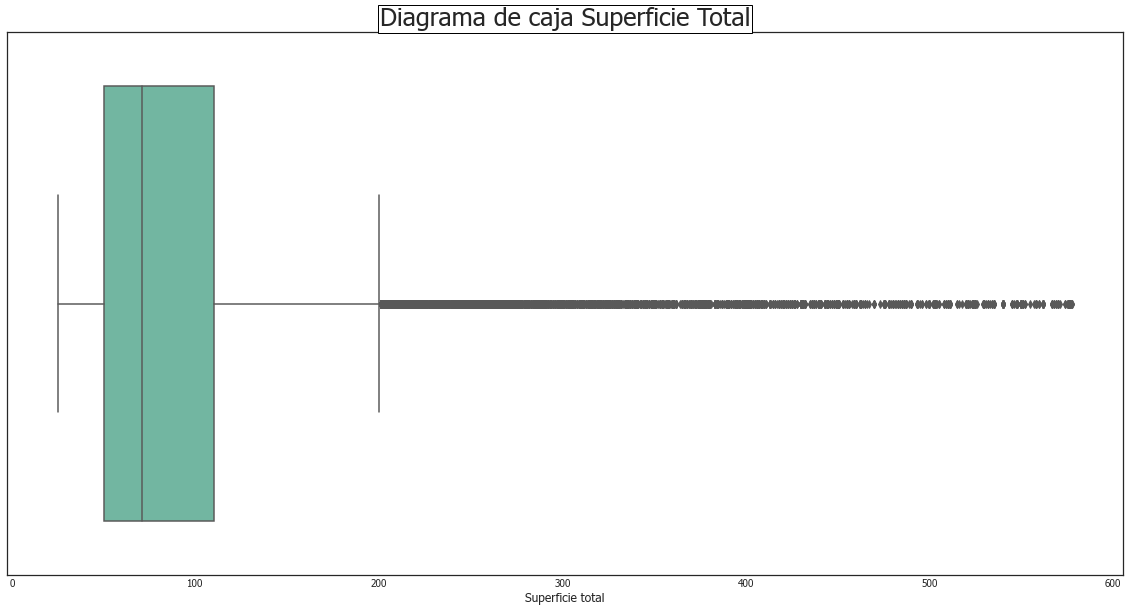

count    81707.000000
mean        94.557565
std         72.473591
min         25.000000
25%         50.000000
50%         71.000000
75%        110.000000
max        578.000000
Name: Superficie_total, dtype: float64

In [27]:
# Repito boxplot de la Superficie total pero sin desagregar por tipo de propiedad y sumo un describe para analizar la metrica.
ax= sns.boxplot (data =df, x ='Superficie_total',color='mediumaquamarine',palette="Set2")
ax.set_title ('Diagrama de caja Superficie Total',
              fontsize=25,bbox={"facecolor":"1","pad":2})
plt.xlabel('Superficie total', fontsize=12)
plt.show()
df.Superficie_total.describe ()

Al consolidar los tres tipos de propiedad nuestro diagrama de caja nos muestra muchos más valores atípicos. Esto se debe a la gran dispersión que existe entre los diferentes tipos de propiedad sin embargo aún podemos apreciar la mediana del conjunto total de nuestro dataset.

In [28]:
# Verifico que se cumpla la condición que la Superficie total es mayor que la superficie cubierta.
mascara = df.Superficie_total > df.Superficie_cubierta
print (mascara)

0         False
1          True
2         False
3          True
5         False
          ...  
146554     True
146555     True
146556     True
146557    False
146558     True
Length: 81707, dtype: bool


In [29]:
# Dado que no se cumple la condición realizo un nuevo filtro.
df = pd.DataFrame(df[df.Superficie_total > df.Superficie_cubierta])
print('Cantidad de filas y columnas:',df.shape)

Cantidad de filas y columnas: (56333, 19)


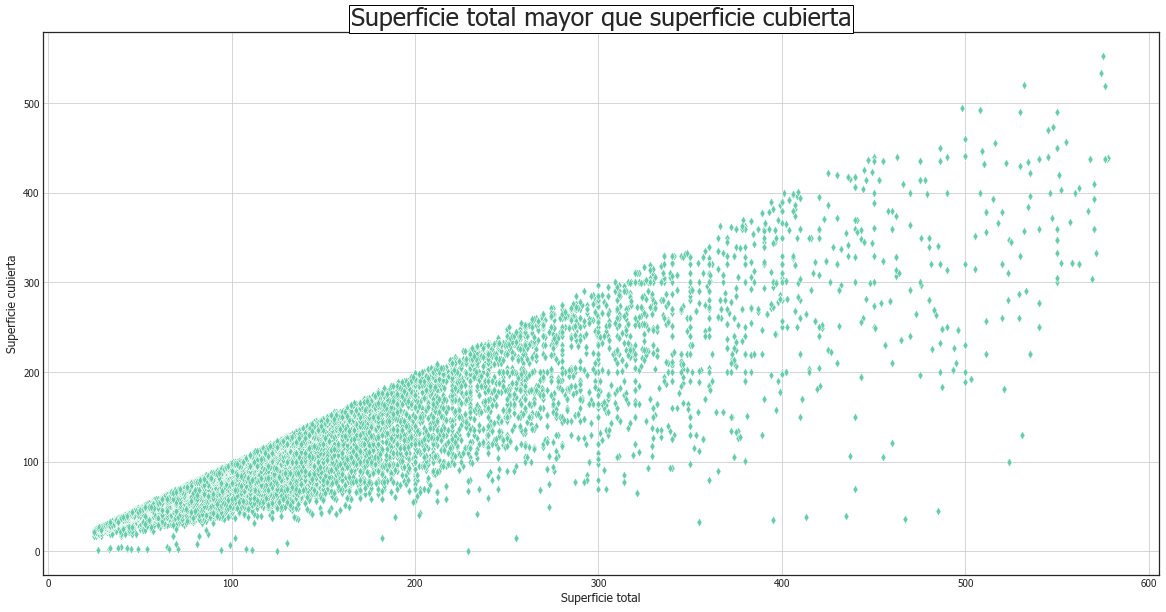

In [30]:
# Grafico para confirmar que después del recorte del dataset ya ninguna propiedad tiene una superficie cubierta mayor a la superficie total.
ax=sns.scatterplot(data=df, x='Superficie_total', y='Superficie_cubierta',color='mediumaquamarine', marker= 'd',palette="Set2")
ax.set_title ('Superficie total mayor que superficie cubierta',fontsize=25,bbox={"facecolor":"1","pad":2})
plt.xlabel('Superficie total', fontsize=12)
plt.ylabel('Superficie cubierta', fontsize=12)
plt.grid()
plt.show()

Podemos observar claramente como la Superficie total delimita a la Superficie cubierta.

In [31]:
# Ahora aplicaremos el rango intercuatilico IQR pero al precio de las propiedades.
unique= df['Tipo_de_propiedad'].unique()
for x in unique:
    Q1 = df[df['Tipo_de_propiedad']==x]['Precio'].quantile(0.25)
    Q3 = df[df['Tipo_de_propiedad']==x]['Precio'].quantile(0.75)
    IQR = Q3 - Q1
    precio_min = df[df['Tipo_de_propiedad']==x]['Precio'].quantile(0.01)
    precio_max = Q3 + (IQR*1.5)
    print(x)
    print("El precio maximo es {}, el precio minimo es {} y el IQR {}" .format(precio_max,precio_min,IQR))
    print('------------------------------------------------------------------------------')

PH
El precio maximo es 465000.0, el precio minimo es 69480.0 y el IQR 130000.0
------------------------------------------------------------------------------
Departamento
El precio maximo es 512972.5, el precio minimo es 69000.0 y el IQR 151189.0
------------------------------------------------------------------------------
Casa
El precio maximo es 765000.0, el precio minimo es 95000.0 y el IQR 210000.0
------------------------------------------------------------------------------


In [32]:
df_ph=df_ph[(df_ph.Precio<=465000.0)&(df_ph.Precio>=69480.0)]
df_dpto=df_dpto[(df_dpto.Precio<=512972.0)&(df_dpto.Precio>=151189.0)]
df_casa=df_casa[(df_casa.Precio<=765000.0)&(df_casa.Precio>=95000.0)]

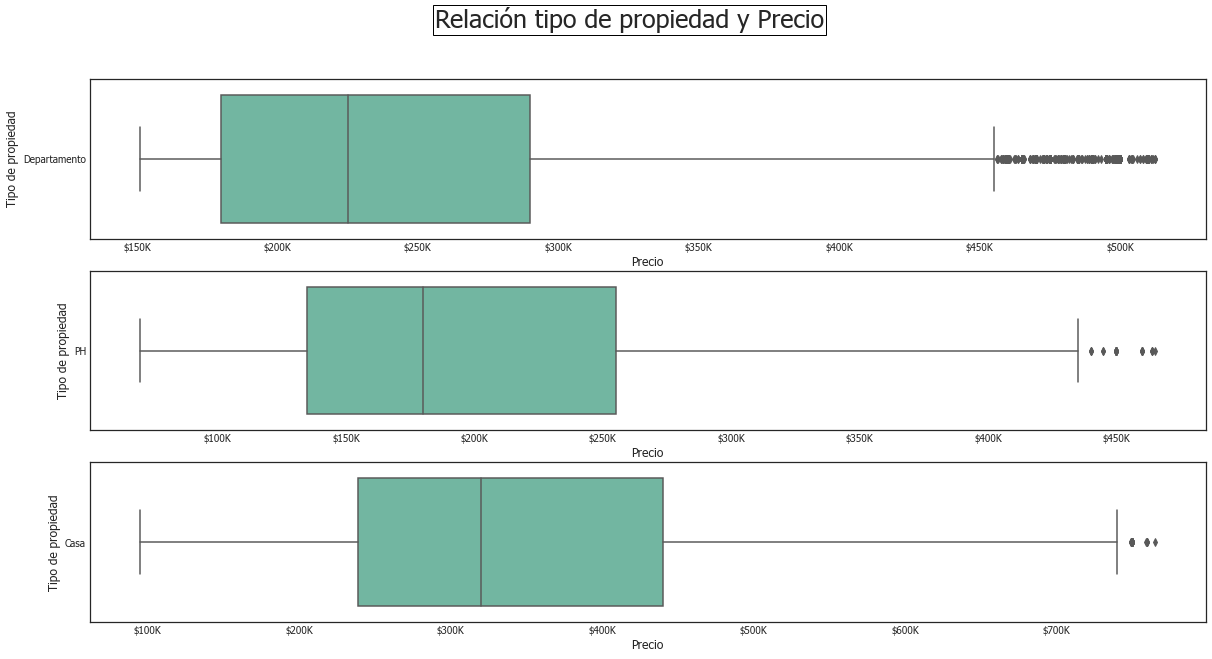

In [33]:
# Grafico los boxplot por tipo de propiedad sin outliers del atributo Precio
plt.figure (figsize=(20,10))
plt.suptitle('Relación tipo de propiedad y Precio',fontsize=25,bbox={"facecolor":"1","pad":2})
# Defino una función que me permita abreviar los ceros de los miles o millones con una letra y agrego el signo $
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

plt.subplot(3,1,1)
ax=sns.boxplot(data=df_dpto,x='Precio',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)
ax.xaxis.set_major_formatter(currency)

plt.subplot(3,1,2)
ax=sns.boxplot(data=df_ph,x='Precio',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)
ax.xaxis.set_major_formatter(currency)

plt.subplot(3,1,3)
ax=sns.boxplot(data=df_casa,x='Precio',y='Tipo_de_propiedad',color='mediumaquamarine',palette='Set2')
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Tipo de propiedad', fontsize=12)
ax.xaxis.set_major_formatter(currency)

plt.show()

Una vez podemos observar la mediana por cada tipo de propiedad luego de realizar nuestro proceso ETL sobre la métrica precio. Nos volvemos a encontrar con una distribución asimétrica donde los valores más altos pertenecen al segmento tipo casa, mientras que la dispersión del precio es muy similar en casa Tipo de propiedad.

In [34]:
# Realizo un nuevo corte delimitando la columna Precio para quedarme con las instancias que determinamos con el rango intercuartilico IQR.
df = pd.DataFrame (df[(df.Precio > 69000) & (df.Precio < 765000)])
print('Cantidad de filas y columnas:',df.shape)

Cantidad de filas y columnas: (53640, 19)


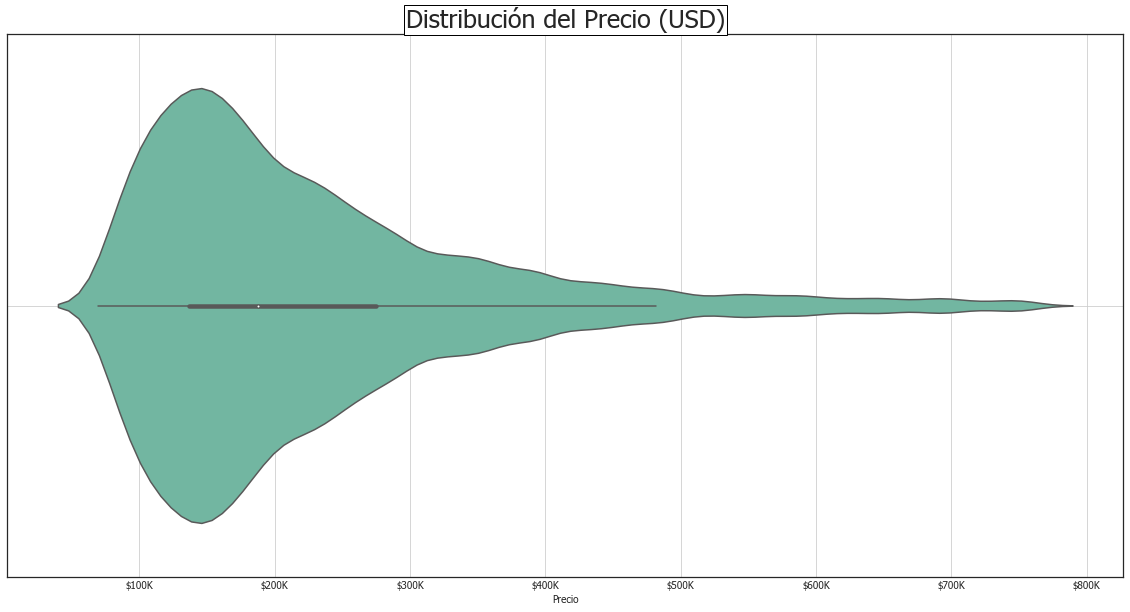

count     53640.000000
mean     226638.647334
std      129699.065663
min       69322.000000
25%      137000.000000
50%      188000.000000
75%      275000.000000
max      760100.000000
Name: Precio, dtype: float64

In [35]:
# Realizo estadísticos y algunos gráficos que me permitan verificar si hacen sentido los recortes. 
ax = sns.violinplot (data =df, x = 'Precio',color='mediumaquamarine',palette="Set2")
ax.set_title ('Distribución del Precio (USD)',
              fontsize=25,bbox={"facecolor":"1","pad":2})
ax.xaxis.set_major_formatter(currency)
plt.grid()
plt.show()
df.Precio.describe ()

Realizo un diagrama de violín para el conjunto total de nuestro dataset para mostrar la forma de distribución del precio. De esta manera en un único grafico podemos observar la densidad de los datos, su mediana como así también el intervalo de confianza y el rango intercuartílico.

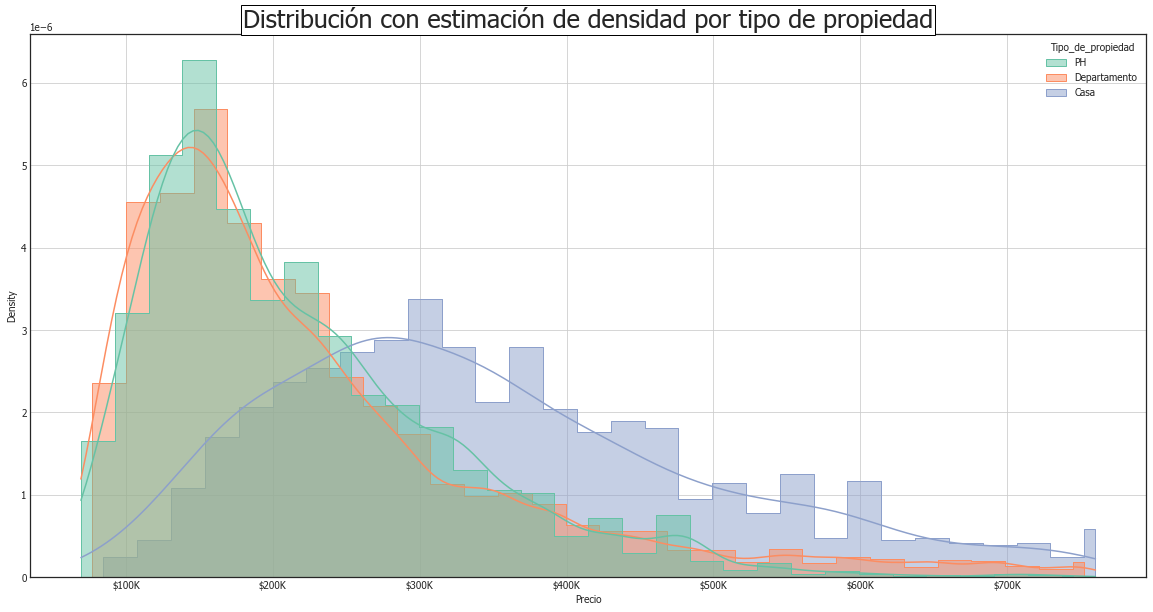

In [36]:
# Realizo un histograma de la relación precio y tipo de propiedad sobre el dataset completo sin outliers.
# La estimación de la densidad de Kernel proporciona información complementaria sobre la forma de la distribución.
ax= sns.histplot(data=df, x='Precio', hue= 'Tipo_de_propiedad',bins=30, palette='Set2', kde=True,multiple='dodge',
             element='step',stat="density", common_norm=False) 
ax.set_title ('Distribución con estimación de densidad por tipo de propiedad',
              fontsize=25,bbox={"facecolor":"1","pad":2})
ax.xaxis.set_major_formatter(currency)
plt.grid()
plt.show()
# Utilice la normalización de densidad independiente para poder comparar la distribución por tipo de propiedad.

Grafico la distribución por tipo de propiedad con un gráfico de barras para hacer más visual lo observado nuestro diagrama de caja. Obtenemos las mismas conclusiones.

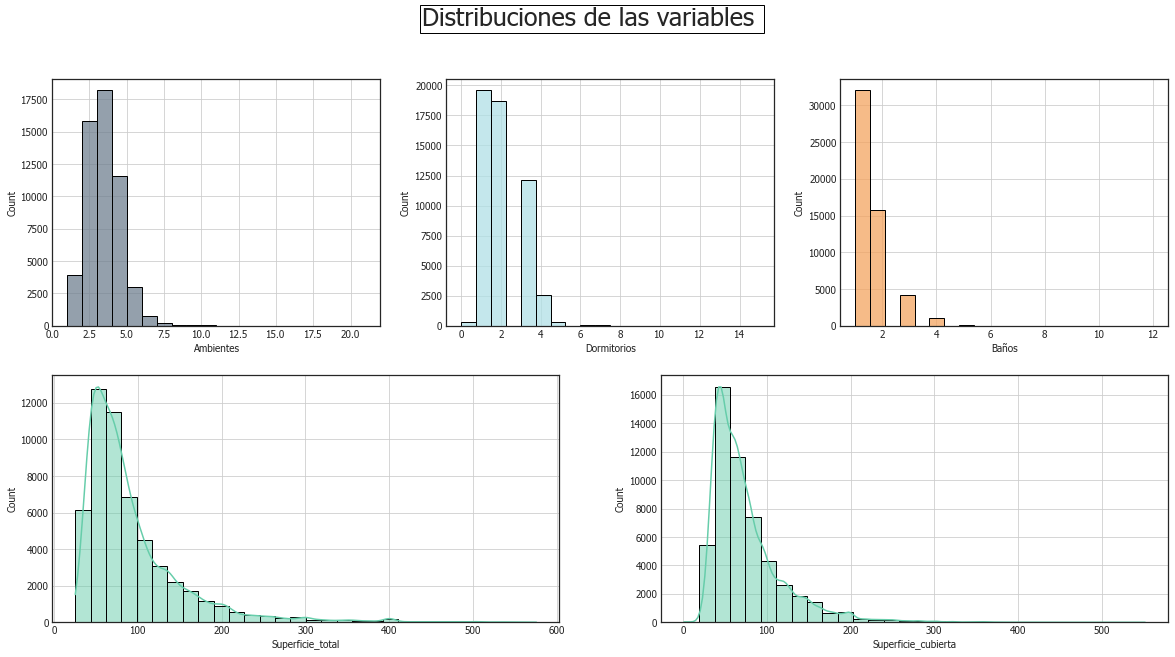

In [37]:
# Realizo las distribuciones de cada variable.
plt.figure (figsize=(20,10))
plt.suptitle('Distribuciones de las variables ',fontsize=25,bbox={"facecolor":"1","pad":2})

plt.subplot(2,3,1)
sns.histplot(data=df, x='Ambientes', kde=False, color='slategray',bins=20)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(data=df, x='Dormitorios', kde=False, color='powderblue',bins=20)
plt.grid()

plt.subplot(2,3,3)
sns.histplot(data=df, x='Baños', kde=False, color='sandybrown',bins=20)
plt.grid()

plt.subplot (2,2,3)
sns.histplot(data=df, x='Superficie_total', kde=True, color='mediumaquamarine',bins=30)
plt.grid()

plt.subplot (2,2,4)
sns.histplot(data=df, x='Superficie_cubierta', kde=True, color='mediumaquamarine',bins=30)
plt.grid()

plt.show()

Distribuciones de las variables. Las concentraciones de nuestros datos se encuentran de 2 a 5 ambientes y 1 o 2 baños. Además, queda presentado visualmente como las distribuciones de las Superficies se asemejan bastante lo cual hace sentido.

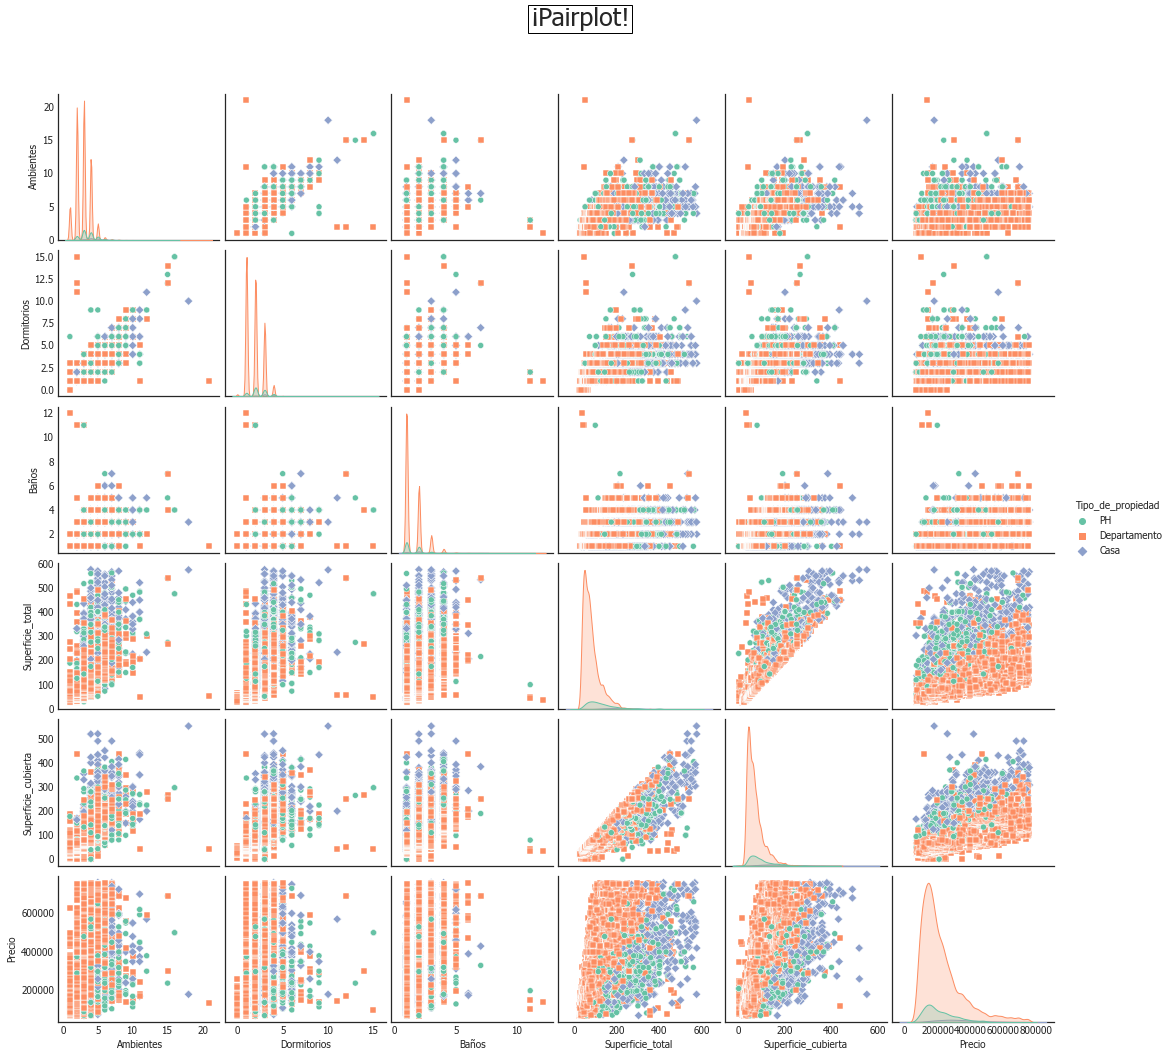

In [38]:
# Punto 6 utilizamos la función pairplot.
g= sns.pairplot(df,x_vars=['Ambientes','Dormitorios','Baños','Superficie_total','Superficie_cubierta','Precio'],
                y_vars=['Ambientes','Dormitorios','Baños','Superficie_total','Superficie_cubierta','Precio'], 
                hue = 'Tipo_de_propiedad',palette='Set2',markers=["o", "s", "D"])
plt.subplots_adjust(top=0.9)
g.fig.suptitle ('¡Pairplot!',fontsize=25,bbox={"facecolor":"1","pad":2})
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

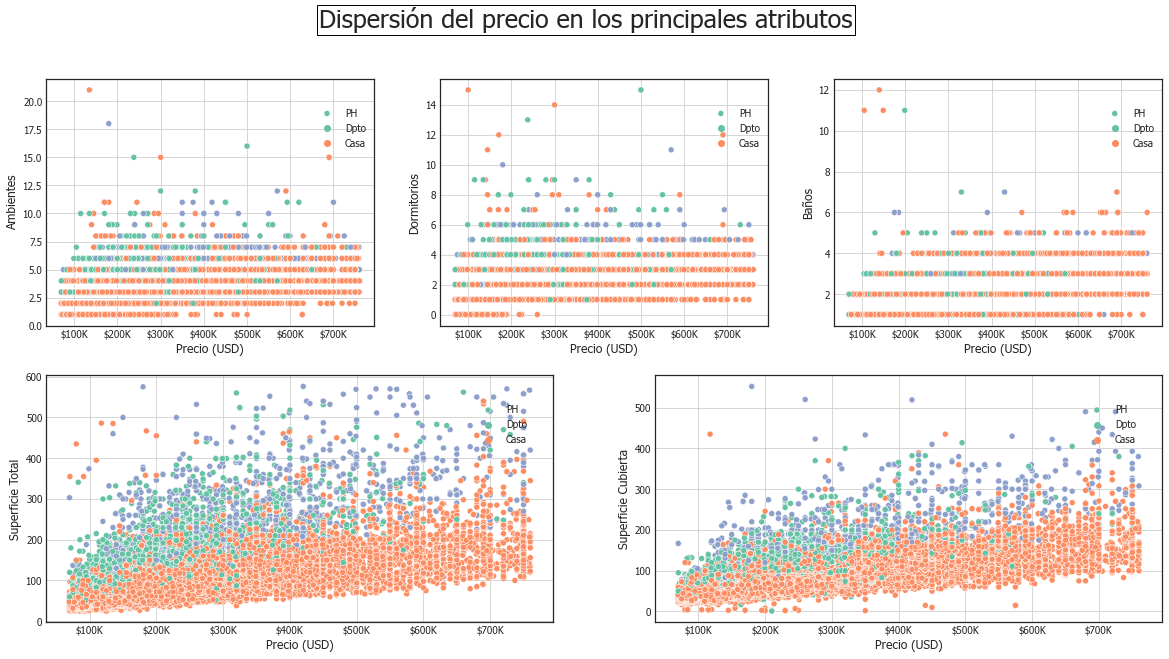

In [39]:
# Antes de ir a las correlaciones me interesa ver la dispersión por tipo de propiedad vs precio.
plt.figure (figsize=(20,10))
plt.suptitle('Dispersión del precio en los principales atributos',fontsize=25,bbox={"facecolor":"1","pad":2})

plt.subplot(2,3,1)
ax =sns.scatterplot(x='Precio', y='Ambientes',hue='Tipo_de_propiedad', data=df,palette="Set2")
plt.grid()
ax.xaxis.set_major_formatter(currency)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Ambientes', fontsize=12)
labels = ['PH','Dpto','Casa']
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),loc='center', borderaxespad=-1)

plt.subplot(2,3,2)
ax =sns.scatterplot(x='Precio', y='Dormitorios',hue='Tipo_de_propiedad',data=df,palette="Set2")
plt.grid()
ax.xaxis.set_major_formatter(currency)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Dormitorios', fontsize=12)
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),loc='center', borderaxespad=-1)

plt.subplot(2,3,3)
ax =sns.scatterplot(x='Precio', y='Baños',hue='Tipo_de_propiedad', data=df,palette="Set2")
plt.grid()
ax.xaxis.set_major_formatter(currency)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Baños', fontsize=12)
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),loc='center', borderaxespad=-1)

plt.subplot (2,2,3)
ax =sns.scatterplot(x='Precio', y='Superficie_total',hue='Tipo_de_propiedad', data=df,palette="Set2")
plt.grid()
ax.xaxis.set_major_formatter(currency)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel( 'Superficie Total', fontsize=12)
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),loc='center', borderaxespad=-1)

plt.subplot (2,2,4)
ax =sns.scatterplot(x='Precio', y='Superficie_cubierta',hue='Tipo_de_propiedad', data=df,palette="Set2")
ax.xaxis.set_major_formatter(currency)
plt.grid()
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel( 'Superficie Cubierta', fontsize=12)
plt.legend(labels= labels,bbox_to_anchor=(0.9, 0.8),loc='center', borderaxespad=-1)

plt.show()

Podemos notar que la distribución de nuestra variable a predecir no guarda una relación lineal con ninguna de nuestros atributos. Hay una tendencia casi imperceptible que a medida que aumenta el precio crece la superficie, pero tampoco se respeta en todos los casos. Nos encontramos propiedades donde la superficie es grande y no así su precio y viceversa. Por tanto, no podemos ser categóricos con la relación hasta que realicemos las correlaciones.

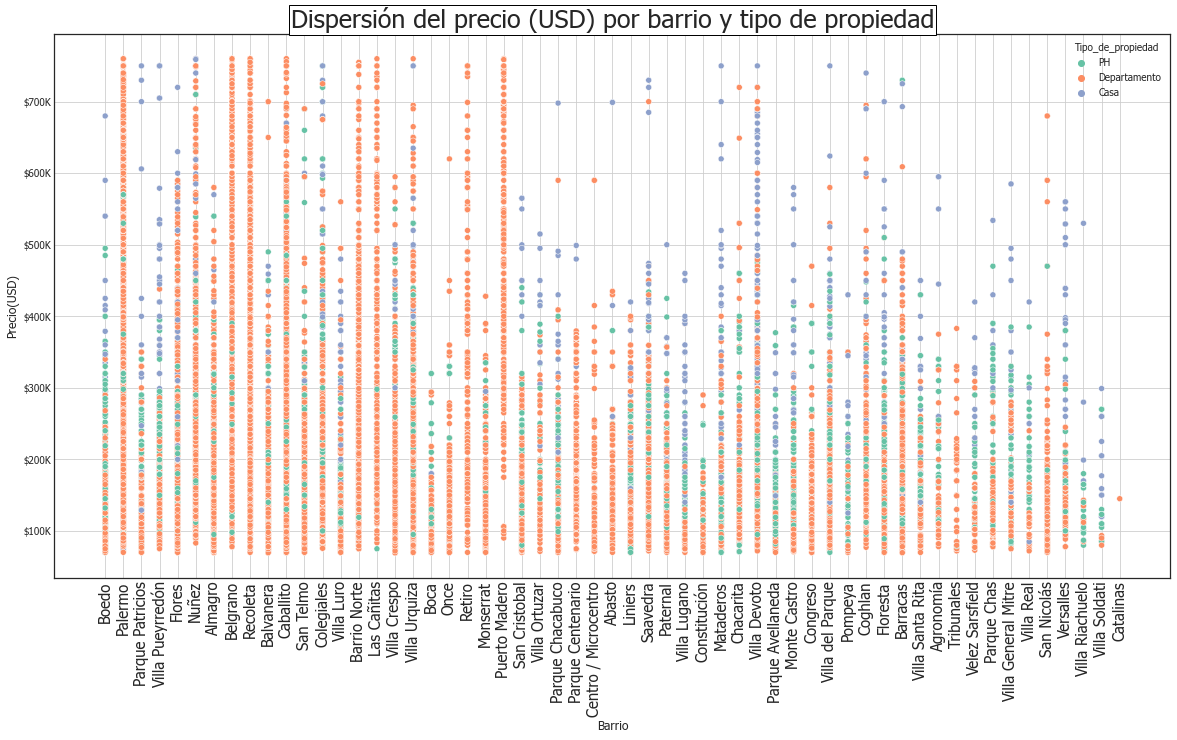

In [40]:
# Por último quiero ver la disperción del precio por barrio y tipo de propiedad.
ax =sns.scatterplot(x='Barrio', y='Precio',hue='Tipo_de_propiedad', data=df,palette="Set2")
ax.yaxis.set_major_formatter(currency)
plt.tick_params(axis='x', labelrotation=90, labelsize =15)
plt.xlabel ('Barrio', fontsize=12)
plt.ylabel( 'Precio(USD)', fontsize=12)
ax.set_title ('Dispersión del precio (USD) por barrio y tipo de propiedad',
              fontsize=25,bbox={"facecolor":"1","pad":2})
plt.grid()
plt.show()

En cuanto a la distribución por barrio es llamativo como predomina el tipo Departamento. Podemos establecer rápidamente los barrios más caros como así mismo donde tenemos más cantidad de propiedades publicadas.

In [41]:
# Determino las variables que me interesan correlacionar.
correlacion = df[['Ambientes','Dormitorios','Baños','Superficie_total',
                  'Superficie_cubierta', 'Precio']].corr()

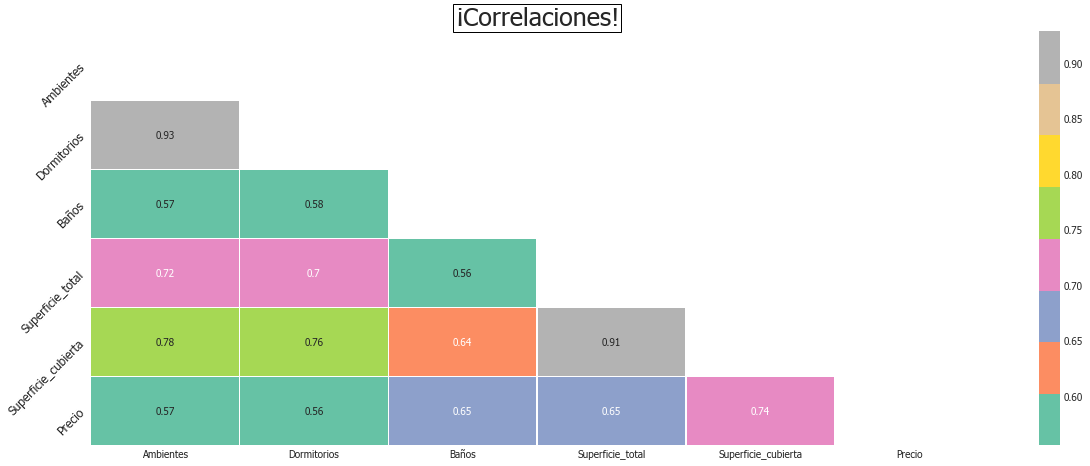

In [42]:
# y ahora si realizo un mapa de calor para ver la correlación.
matrix=np.triu(correlacion)
ax = sns.heatmap(correlacion,cmap="Set2", annot = True, linewidths=.5,mask=matrix)
plt.subplots_adjust(top=0.7)
ax.set_title ('¡Correlaciones!',fontsize=25,bbox={"facecolor":"1","pad":2})
plt.tick_params(axis='y', labelrotation=45, labelsize =12)
plt.show()

Para completar nuestro análisis las correlaciones resultan clave. Podemos ver como en nuestra variable a predecir la superficie cubierta es la que mayor peso tiene sobre el precio con 0.74. A su vez, las variables ambientes y dormitorios como la superficie total y cubierta mantienen una relación cercana a 1, con 0,93 y 0,91 respectivamente. Factores a considerar al momento de realizar nuestros modelos.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

¿La Superficie total define el valor de la propiedad?

In [43]:
# Obtengo el TOP 5 de los Barrios con propiedades más grandes.
df.groupby('Barrio')['Superficie_total'].max().sort_values(ascending=False).head()

Barrio
Velez Sarsfield    576.0
Boca               575.0
Barracas           570.0
Versalles          570.0
Villa Devoto       569.0
Name: Superficie_total, dtype: float64

In [44]:
# TOP 5 de los Barrios con las propiedades más costosas.
df.groupby('Barrio')['Precio'].max().sort_values(ascending=False).head()

Barrio
Caballito        760100.0
Palermo          760000.0
Villa Urquiza    760000.0
Belgrano         760000.0
Las Cañitas      760000.0
Name: Precio, dtype: float64

¡No coinden! Las propiedades más grandes no son las más caras. Por tanto podemos concluir que la Superficie total no determina el valor de la propiedad(o al menos no es el único atributo que lo define).

In [45]:
# Agrego una columna que calcule el valor por metro cuadrado.
df ['Precio_por_m2'] = round (df.Precio / df.Superficie_total, 2)
df.head(3)

,start_date,end_date,created_on,Latitud,Longitud,País,Localidad,Barrio,Ambientes,Dormitorios,Baños,Superficie_total,Superficie_cubierta,Precio,Divisa,Título,Descripción,Tipo_de_propiedad,Tipo_de_operación,Precio_por_m2
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.43
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.59
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta,1977.78


In [46]:
# Top 5 con mayor valor por metro cuadrado por Barrio.
df.groupby('Barrio')['Precio_por_m2'].max().sort_values(ascending=False).head()

Barrio
Puerto Madero    8582.09
Palermo          8421.05
Barrio Norte     7571.43
Recoleta         7142.86
Belgrano         6971.83
Name: Precio_por_m2, dtype: float64

Al calcular el valor del metro cuadrado podemos identificar los barrios más costosos idenpendientemente de su Superficie total. Ahora, ¿Que tipo de propiedad es más cara?

In [47]:
# Antes, realizo un recuento por Tipo de propiedad.
df.groupby('Tipo_de_propiedad').size().sort_values(ascending=False)

Tipo_de_propiedad
Departamento    46401
PH               5683
Casa             1556
dtype: int64

¡Atención! La muestra no resulta representativa dentro del dataset para el tipo de propiedad PH y Casa. Por tanto no podemos ser concluyentemente y determinar que tipo de propiedad es la más costosa.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión - para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (X) y la variable a predecir (y).
* Realizar un Train/Test split de los datos.
* Generar un modelo benchmark y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
* Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

**Estos lineamientos corresponden al mínimo entregable de esta sección.**

**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
4. Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
5. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [48]:
# Vuelvo a cargar el dataset.
datos_properati = pd.read_csv ('DS_Proyecto_01_Datos_Properati.csv')
# Filtro las propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
df = pd.DataFrame(datos_properati[datos_properati.property_type.isin(['Departamento','PH','Casa']) 
                                   & (datos_properati.l2 =='Capital Federal')])
# Filtro las propiedades cuya superficie total es menor igual a 1000 m2 y mayor igual a 15 m2.
df=df[(df.surface_total <= 1000) & (df.surface_total >= 15)]
# Nuevo filtro: propiedades cuya precio es menor igual 4000000 dólares.
df=df[(df.price <= 4000000)]
# Seleciono las columnas: rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
df = df[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
# Elimino aquellas instacias con valores faltantes.
df=df.dropna()
# Imprimo la cantidad de instancias y columnas para verificar el Checkpoint.
print('Cantidad de filas y columnas:',df.shape)

Cantidad de filas y columnas: (81019, 6)


Para el desarrollo del modelo elijo trabajar con el Error Absoluto Medio (Mean Absolute Error o MAE) + el coeficiente de determinación (R2 o R-squared) mide la porción de la varianza de la variable objetivo que se puede explicar por el modelo y La Raíz del Error Cuadrático Medio (Root Mean Squared Error o RMSE). Está última se diferencia del MSE ya que su resultado se puede medir en las mismas unidades que la variable objetivo.
Elijo 3 métodos y no uno porque entiendo que el complemento de las oportunidades y desventajas de los tres me ayudaran a tomar mejores decisiones con mi modelo.

In [49]:
# Importo las librerias necesarias paraempezar mi moldelo.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [50]:
# Selecciono las variables predictoras (X) y la variable a predecir (y).
X =df.drop('price',axis=1)
y =df.price

In [51]:
# Imprimo las primeras 3 instancias de X.
X.head(3)

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0


In [52]:
# Imprimo las primeras 3 instancias de y.
y.head(3)

0    153000.0
1    159000.0
2    125000.0
Name: price, dtype: float64

In [53]:
# Realizo un Train/Test split de los datos.
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [54]:
# Genero un modelo benchmark.
regressor = LinearRegression()

In [55]:
# Lo entreno...
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
# y obtengo sus predicciones.
y_train_pred= regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

In [57]:
# Evaluo nuestro modelo base.
MAE_train=mean_absolute_error(y_train,y_train_pred)
MAE_test=mean_absolute_error(y_test,y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",MAE_train)
print("El MAE en test es:",MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",r2_train)
print("El r2 de test es:",r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",adj_r2_train)
print("El r2 ajustado de test es:",adj_r2_test)

El MAE en train es: 96179.99029116333
El MAE en test es: 97191.46596620383
-------------------------------------------
El RMSE en train es: 199173.83253528475
El RMSE en test es: 202449.3654036158
-------------------------------------------
El r2 de train es: 0.5517887107017188
El r2 de test es: 0.5514864358797198
-------------------------------------------
El r2 ajustado de train es: 0.5517491907756692
El r2 ajustado de test es: 0.5513941491381313


In [58]:
# Defino los modelos con hiperparámetros por default.
arbol_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

In [59]:
# ¡Los entreno..
arbol_regressor.fit(X_train,y_train)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [60]:
# y predigo!
y_arbol_pred_train = arbol_regressor.predict(X_train)
y_arbol_pred_test = arbol_regressor.predict(X_test)

y_knn_pred_train = knn_regressor.predict(X_train)
y_knn_pred_test = knn_regressor.predict(X_test)

In [61]:
# Ahora sí, a evaluarlos. Primero nuestro árbol.
arbol_MAE_train=mean_absolute_error(y_train,y_arbol_pred_train)
arbol_MAE_test=mean_absolute_error(y_test,y_arbol_pred_test)

arbol_RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_pred_train))
arbol_RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_pred_test))

arbol_r2_train= metrics.r2_score(y_train, y_arbol_pred_train)
arbol_r2_test= metrics.r2_score(y_test, y_arbol_pred_test)

arbol_adj_r2_train = 1 - ((1 - arbol_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
arbol_adj_r2_test = 1 - ((1 - arbol_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",arbol_MAE_train)
print("El MAE en test es:",arbol_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",arbol_RMSE_train)
print("El RMSE en test es:",arbol_RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",arbol_r2_train)
print("El r2 de test es:",arbol_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",arbol_adj_r2_train)
print("El r2 ajustado de test es:",arbol_adj_r2_test)

El MAE en train es: 23139.40578298377
El MAE en test es: 51684.349277964444
-------------------------------------------
El RMSE en train es: 52460.90877279167
El RMSE en test es: 152027.4760376709
-------------------------------------------
El r2 de train es: 0.9689050509344366
El r2 de test es: 0.7470778220448541
-------------------------------------------
El r2 ajustado de train es: 0.9689023092139201
El r2 ajustado de test es: 0.7470257804444518


In [62]:
# Obvio, ahora evaluamos nuestros vecinos.
knn_MAE_train=mean_absolute_error(y_train,y_knn_pred_train)
knn_MAE_test=mean_absolute_error(y_test,y_knn_pred_test)

knn_RMSE_train=np.sqrt(mean_squared_error(y_train,y_knn_pred_train))
knn_RMSE_test=np.sqrt(mean_squared_error(y_test,y_knn_pred_test))

knn_r2_train= metrics.r2_score(y_train, y_knn_pred_train)
knn_r2_test= metrics.r2_score(y_test, y_knn_pred_test)

knn_adj_r2_train = 1 - ((1 - knn_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
knn_adj_r2_test = 1 - ((1 - knn_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",knn_MAE_train)
print("El MAE en test es:",knn_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",knn_RMSE_train)
print("El RMSE en test es:",knn_RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",knn_r2_train)
print("El r2 de test es:",knn_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",knn_adj_r2_train)
print("El r2 ajustado de test es:",knn_adj_r2_test)

El MAE en train es: 51593.16016786275
El MAE en test es: 61921.19480786637
-------------------------------------------
El RMSE en train es: 121300.24049431273
El RMSE en test es: 155040.1332898459
-------------------------------------------
El r2 de train es: 0.8337576939918325
El r2 de test es: 0.7369544202301519
-------------------------------------------
El r2 ajustado de train es: 0.8337430359861182
El r2 ajustado de test es: 0.736900295625261


Modelo: Regresión lineal
R2 en Train: 0.5517887107017188
R2 ajustado en train: 0.5517491907756692
--------------------------
R2 en test: 0.5514864358797198
R2 ajustado en Test: 0.5513941491381313
--------------------------
RMSE en train: 199173.83253528475
RMSE en test: 202449.3654036158


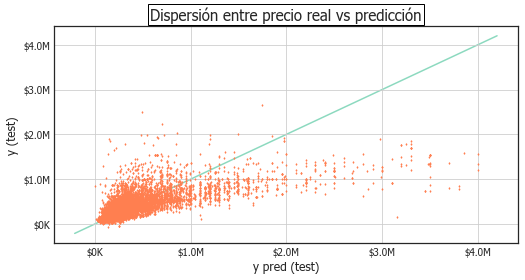

Modelo: Árbol de Decisión
R2 en Train: 0.9689050509344366
R2 ajustado en train: 0.9689023092139201
--------------------------
R2 en test: 0.7470778220448541
R2 ajustado en Test: 0.7470257804444518
--------------------------
RMSE en train: 52460.90877279167
RMSE en test: 152027.4760376709


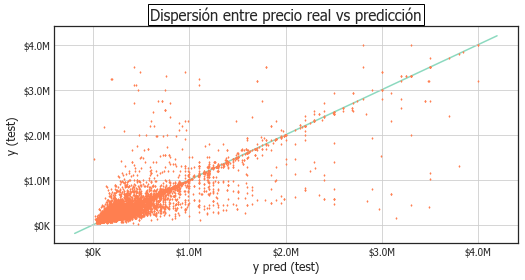

Modelo: Vecinos más cercanos
R2 en Train: 0.8337576939918325
R2 ajustado en train: 0.8337430359861182
--------------------------
R2 en test: 0.7369544202301519
R2 ajustado en Test: 0.736900295625261
--------------------------
RMSE en train: 121300.24049431273
RMSE en test: 155040.1332898459


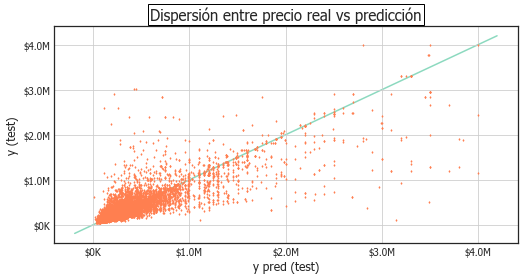

In [63]:
# Gráfico los valores reales vs. valores predichos y evaluamos su performance.
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([regressor, arbol_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =1,c='coral', marker= 'd')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # minimo de ambos ejes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # maximo de ambos ejes
    ]
    
    ax.plot(lims, lims, 'k-', c='mediumaquamarine',alpha=0.75, zorder=0)
    plt.grid()
    plt.xlabel('y pred (test)',fontsize=12)
    plt.ylabel('y (test)',fontsize=12)
    ax.yaxis.set_major_formatter(currency)
    ax.xaxis.set_major_formatter(currency)
    ax.set_title ('Dispersión entre precio real vs predicción',
              fontsize=15,bbox={"facecolor":"1","pad":2})
    
    plt.tight_layout()
    plt.show()

Con los resultados obtenidos vamos a optimizar nuestros modelos.

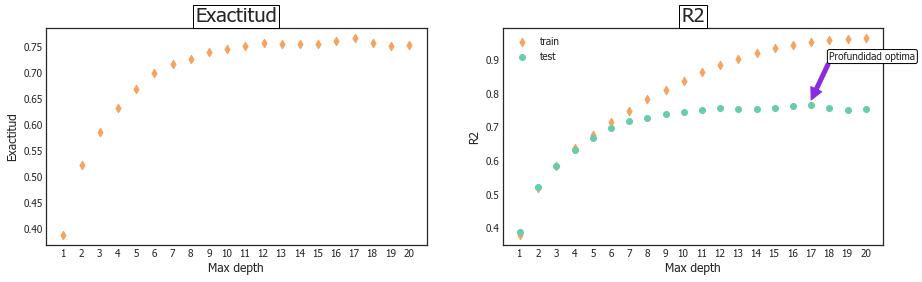

In [64]:
# Para eso utilizaremos un estimador de la profundidad para nuestro árbol.
MAX_DEPTH_range = range(1, 21)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    
    y_test_pred = arbol_regressor.predict(X_test)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(MAX_DEPTH_range,scores,marker="d", c='sandybrown')
ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="d",c='sandybrown',label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",c='mediumaquamarine',label="test")
ax2.annotate('Profundidad optima',(17,0.78),(18,0.90),arrowprops=dict(color='blueviolet'),
             bbox=dict(boxstyle='round,pad=0.2', fc="w"))

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)

ax2.legend()

ax1.set_title('Exactitud',fontsize=20,bbox={"facecolor":"1","pad":2})
ax1.set_xlabel('Max depth',fontsize=12)
ax1.set_ylabel('Exactitud',fontsize=12)

ax2.set_title('R2',fontsize=20,bbox={"facecolor":"1","pad":2})
ax2.set_xlabel('Max depth',fontsize=12)
ax2.set_ylabel('R2',fontsize=12)


plt.show()

¡Encontramos la profundiad optima de nuestro árbol! El max depth ideal es de 17.

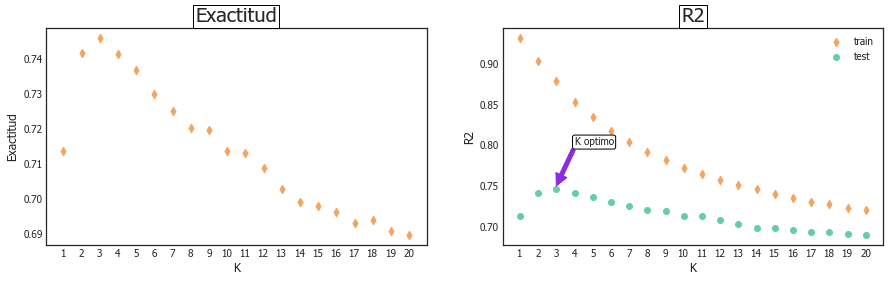

In [65]:
# Claro, ahora veamos la cantidad ideal para nuestro modelo de vecinos.
k_range = range(1, 21)
scores = []
r2_train_pred=[]
r2_train_test=[]

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train, y_train)
    scores.append(knn_regressor.score(X_test, y_test))
    
    y_train_pred = knn_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = knn_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(k_range,scores,marker="d",c='sandybrown')
ax2.scatter(k_range,r2_train_pred,marker="d",c='sandybrown',label="train")
ax2.scatter(k_range,r2_train_test,marker="o",c='mediumaquamarine',label="test")
ax2.annotate('K optimo',(3,0.75),(4,0.80),arrowprops=dict(color='blueviolet'),
             bbox=dict(boxstyle='round,pad=0.2', fc="w"))

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)


ax2.legend()


ax1.set_title('Exactitud',fontsize=20,bbox={"facecolor":"1","pad":2})
ax1.set_xlabel('K',fontsize=12)
ax1.set_ylabel('Exactitud',fontsize=12)

ax2.set_title('R2',fontsize=20,bbox={"facecolor":"1","pad":2})
ax2.set_xlabel('K',fontsize=12)
ax2.set_ylabel('R2',fontsize=12)

plt.show()

¡Ya tenemos la cantidad de vecinos optima para nuestro modelo! Se encuentra en 3 vecinos con un exactitud de 0.75, no está nada mal, ¿no?

In [66]:
# Vamos a entrenar nuestros modelos nuevamente pero esta vez con los ¡hiperparámetros ideales!
arbol_optimo = DecisionTreeRegressor(max_depth= 17,random_state=42)
arbol_optimo.fit(X_train,y_train)

knn_optimo = KNeighborsRegressor(n_neighbors=3)
knn_optimo.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Regresión lineal
R2 en Train: 0.5517887107017188
R2 ajustado en train: 0.5517491907756692
--------------------------
R2 en test: 0.5514864358797198
R2 ajustado en Test: 0.5513941491381313
--------------------------
RMSE en train: 199173.83253528475
RMSE en test: 202449.3654036158


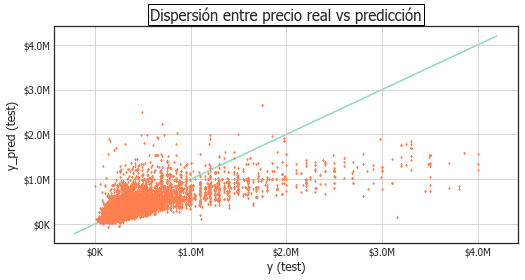

Modelo: Árbol de Decisión
R2 en Train: 0.9526729314607341
R2 ajustado en train: 0.9526687585130786
--------------------------
R2 en test: 0.7664391103044594
R2 ajustado en Test: 0.7663910525082258
--------------------------
RMSE en train: 64721.0697732051
RMSE en test: 146092.75848556007


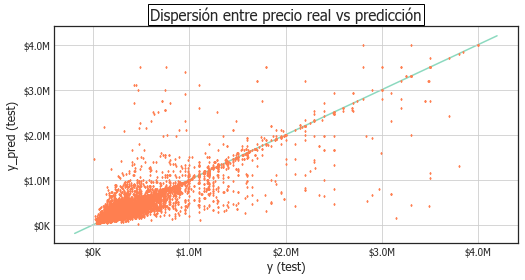

Modelo: Vecinos más cercanos
R2 en Train: 0.8782558355018295
R2 ajustado en train: 0.8782451010101002
--------------------------
R2 en test: 0.7461108240704453
R2 ajustado en Test: 0.7460585834992663
--------------------------
RMSE en train: 103804.20852724434
RMSE en test: 152317.82229037234


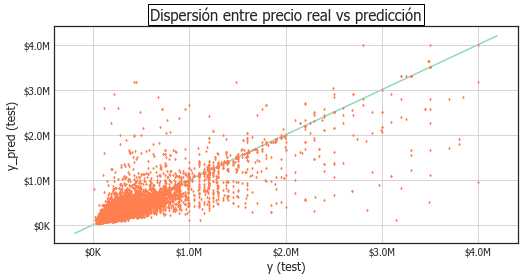

In [67]:
# Volvemos a evaluar los resultados con nuestros modelos optimizados.
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([regressor, arbol_optimo, knn_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2,c='coral', marker= 'd')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-',c='mediumaquamarine', alpha=0.75, zorder=0)
    plt.grid()
    plt.xlabel('y (test)',fontsize=12)
    plt.ylabel('y_pred (test)',fontsize=12)
    ax.yaxis.set_major_formatter(currency)
    ax.xaxis.set_major_formatter(currency)
    ax.set_title ('Dispersión entre precio real vs predicción',
              fontsize=15,bbox={"facecolor":"1","pad":2})
    
    plt.tight_layout()
    plt.show()

Elijo trabajar con el Árbol de decisión dado que tanto en el modelo sin optimizar como el modelo ya con optimizaciones obtiene los mejores resultados. Sin embargo, el proceso de optimización no logra una mejora sustancial como esperaba. Solo se ven pequeñas mejoras en el apartado de R2 Test.

Los resultados son los siguientes:

Modelo Árbol de decisión sin Optimización:

•	R2 en Train: 0.968 /
•	R2 ajustado en train: 0.968

•	R2 en test: 0.747 /
•	R2 ajustado en Test: 0.747

•	RMSE en train: 52460.908 /
•	RMSE en test: 152027.476

Modelo de Árbol de decisión con Optimización:

	R2 en Train: 0.952 /
	R2 ajustado en train: 0.952

	R2 en test: 0.766 /
	R2 ajustado en Test: 0.766

	RMSE en train: 64721.069 /
	RMSE en test: 146092.758

Para nuestro análisis y modelo de Machine Learning no estamos utilizando información súper valiosa y que nos ayudaría a obtener mejores resultados, como la localidad y el barrio de cada una de las propiedades. Por otro lado, incluimos features con mucha correlación como Ambientes y Dormitorios que tranquilamente podríamos eliminar uno de los dos atributos. Adicional a esto creo que fue una limitación no poder aprovechar todo el EDA realizado en el punto anterior a Machine Learning, tanto los outliers como algunos errores de carga tienen un sesgo en nuestra predicción. Sin dudas tiene oportunidades de mejora, pero a pesar de eso siendo mi primer modelo y sin experiencia previa en código me encuentro muy conforme con lo realizado y con muchas expectativas de poder desafiarme, seguir adquiriendo conocimiento y mejorando en cada sprint tanto como en este.